In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data_vlgr=pd.read_csv("villagers.csv")
data_popul=pd.read_csv("acnh_villager_data.csv")

In [4]:
data_vlgr.sample(5)

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
223,Maple,Cub,Female,Normal,Education,15-Jun,honey,Forest Life,Simple,Cute,Beige,Green,green blossoming wall,wooden-knot flooring,3251;2605;1032;865;4117;7144;3949;3438;4003;97...,cbr01,xgPhy4TnDmnzSkZ6o
154,Gladys,Ostrich,Female,Normal,Education,15-Jan,stretch,K.K. Folk,Elegant,Cute,Green,Pink,shoji screen,tatami,4033;7047;7865;7682;1029;725;3230;7048;7681,ost01,ZSLn6jgRc5W4oZA4f
209,Lionel,Lion,Male,Smug,Music,29-Jul,precisely,K.K. Moody,Gorgeous,Active,Green,Gray,cityscape wall,simple blue flooring,1840;3957;2554;3958;3951;794;3784;9766;2731;3783,lon08,EQYQEL4crTYEN9yJs
380,Walt,Kangaroo,Male,Cranky,Fitness,24-Apr,pockets,K.K. Lament,Cool,Cool,Black,Gray,bamboo-grove wall,mossy-garden flooring,7452;3580;7393;4269;10743;677;710;2754,kgr08,wN36ADi7MxiLNJ3Eu
165,Hamlet,Hamster,Male,Jock,Play,30-May,hammie,K.K. Reggae,Simple,Active,Purple,Blue,blue playroom wall,colorful puzzle flooring,4759;5543;1558;3205;4758;1241;3584;4762;3623;4...,ham00,LA2HHrtZ6beHgmKpL


In [5]:
data_popul.sample(5)

,tier,rank,name
357,6,108,Boyd
396,6,147,Queenie
393,6,144,Monty
317,6,68,Anicotti
354,6,105,Gloria


In [6]:
data_popul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tier    413 non-null    int64 
 1   rank    413 non-null    int64 
 2   name    413 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.8+ KB


In [7]:
data_vlgr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             391 non-null    object
 1   Species          391 non-null    object
 2   Gender           391 non-null    object
 3   Personality      391 non-null    object
 4   Hobby            391 non-null    object
 5   Birthday         391 non-null    object
 6   Catchphrase      391 non-null    object
 7   Favorite Song    391 non-null    object
 8   Style 1          391 non-null    object
 9   Style 2          391 non-null    object
 10  Color 1          391 non-null    object
 11  Color 2          391 non-null    object
 12  Wallpaper        391 non-null    object
 13  Flooring         391 non-null    object
 14  Furniture List   391 non-null    object
 15  Filename         391 non-null    object
 16  Unique Entry ID  391 non-null    object
dtypes: object(17)
memory usage: 52.1+ K

In [8]:
data_vlgr.isnull().sum()

Name               0
Species            0
Gender             0
Personality        0
Hobby              0
Birthday           0
Catchphrase        0
Favorite Song      0
Style 1            0
Style 2            0
Color 1            0
Color 2            0
Wallpaper          0
Flooring           0
Furniture List     0
Filename           0
Unique Entry ID    0
dtype: int64

In [9]:
data_vlgr["Name"].isin(data_popul["name"]).sum()

386

In [11]:
misname = data_popul["name"][data_popul['name'].isin(data_vlgr["Name"])==False]
misname

2               Shino
4               Sasha
5                Ione
25         Cephalobot
57             Étoile
84          Tiansheng
105             Petri
108             Quinn
114             Marlo
116              Chai
146            Azalea
158             Faith
170          Chabwick
202            WartJr
212               Rio
216       Buck(Brows)
222             Renee
224           Chelsea
226             Marty
229           Roswell
261               Zoe
287             OHare
300    Crackle(Spork)
323               Ace
328              Toby
341             Frett
399             Rilla
Name: name, dtype: object

In [12]:
data_popul['name'] = data_popul['name'].replace(['OHare'],"O\'Hare")
data_popul['name'] = data_popul['name'].replace(['Buck(Brows)'],"Buck")
data_popul['name'] = data_popul['name'].replace(['Renee'],"Renée")
data_popul['name'] = data_popul['name'].replace(['WartJr'],"Wart Jr.")
data_popul['name'] = data_popul['name'].replace(['Crackle(Spork)'],"Spork")

In [14]:
data_vlgr["Name"].isin(data_popul['name']).sum()

391

In [17]:
data_popul = data_popul.drop(data_popul[data_popul["name"].isin(data_vlgr["Name"]) == False].index)

In [22]:
print(data_popul.shape)
print(data_vlgr.shape)

(391, 3)
(391, 17)


In [23]:
data_popul.set_index('name', drop=True, inplace=True)
data_vlgr.set_index('Name', drop=True, inplace=True)

In [24]:
data_combined = data_popul.merge(data_vlgr, left_index=True, right_index=True)

In [26]:
data_combined.sample(5)

,tier,rank,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
Goldie,3,16,Dog,Female,Normal,Nature,27-Dec,woof,K.K. Bossa,Simple,Cute,Yellow,Orange,modern wood wall,light parquet flooring,2554;3681;7334;3122;1558;1561;1557;4069;4119;4...,dog00,RdpZtkYzLeivKyx7Z
Poncho,5,62,Cub,Male,Jock,Fitness,2-Jan,li'l bear,K.K. Blues,Simple,Simple,Orange,Yellow,blue simple-cloth wall,blue-paint flooring,4030;7521;7521;8298;1227;1783;4048;3683;1277;3...,cbr02,2yyqShsyFuek2xsPq
Merengue,1,10,Rhino,Female,Normal,Nature,19-Mar,shortcake,K.K. Ballad,Cute,Simple,White,Red,pastel dotted wall,mint dot flooring,4109;1866;3998;998;4000;3697;3785;7134;1161;34...,rhn07,qxaecyD6f6aHuNZKK
Tammi,5,94,Monkey,Female,Peppy,Fashion,2-Apr,chimpy,Imperial K.K.,Cute,Active,Purple,Green,bamboo wall,bamboo flooring,6031;7796;7797;10743;7282;3971;3974;717;3344;3...,mnk03,vYWvCyge46SGeHfHH
Rocket,6,146,Gorilla,Female,Big Sister,Fitness,14-Apr,vroom,K.K. Adventure,Active,Cool,Pink,Red,skyscraper wall,monochromatic tile flooring,7845;4013;7348;7348;7235;1241;1598;7133;7535;7...,gor09,eJNBB5SYzfj5DaWjx


In [27]:
data_combined.drop(columns=['Furniture List', 'Filename', 'Unique Entry ID', "Wallpaper", "Flooring", "Birthday", "Favorite Song"], inplace=True)

In [29]:
data_combined.sample(5)

,tier,rank,Species,Gender,Personality,Hobby,Catchphrase,Style 1,Style 2,Color 1,Color 2
Hans,5,108,Gorilla,Male,Smug,Fitness,groovy,Elegant,Gorgeous,Gray,Blue
Joey,5,47,Duck,Male,Lazy,Play,bleeeeeck,Simple,Simple,Green,Blue
Canberra,5,19,Koala,Female,Big Sister,Play,nuh uh,Active,Cool,Green,Light blue
Tipper,5,68,Cow,Female,Snooty,Fashion,pushy,Gorgeous,Cute,Colorful,Pink
Amelia,6,88,Eagle,Female,Snooty,Music,cuz,Cool,Elegant,Black,White


In [30]:
data_combined.sort_values(['tier', 'rank'], inplace=True)
data_combined['overall_ranking'] = np.arange(1, len(data_combined)+1)
data_combined.insert(2, 'overall_ranking', data_combined.pop('overall_ranking'))

In [31]:
data_combined.sample(5)

,tier,rank,overall_ranking,Species,Gender,Personality,Hobby,Catchphrase,Style 1,Style 2,Color 1,Color 2
Katt,3,26,61,Cat,Female,Big Sister,Music,purrty,Cool,Cool,Purple,Black
Ozzie,5,43,160,Koala,Male,Lazy,Play,ol' bear,Simple,Cute,Yellow,Orange
Groucho,6,42,274,Bear,Male,Cranky,Music,grumble,Cool,Simple,Black,Gray
Ursala,6,56,288,Bear,Female,Big Sister,Music,grooomph,Simple,Cute,Red,Orange
Cleo,6,77,308,Horse,Female,Snooty,Education,sugar,Cute,Elegant,Light blue,White


In [35]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, Raymond to Velma
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tier             391 non-null    int64 
 1   rank             391 non-null    int64 
 2   overall_ranking  391 non-null    int32 
 3   Species          391 non-null    object
 4   Gender           391 non-null    object
 5   Personality      391 non-null    object
 6   Hobby            391 non-null    object
 7   Catchphrase      391 non-null    object
 8   Style 1          391 non-null    object
 9   Style 2          391 non-null    object
 10  Color 1          391 non-null    object
 11  Color 2          391 non-null    object
dtypes: int32(1), int64(2), object(9)
memory usage: 38.2+ KB


In [33]:
overall_mean = data_combined.overall_ranking.mean()
overall_mean

196.0

In [36]:
data_combined["Gender"].value_counts()

Male      204
Female    187
Name: Gender, dtype: int64

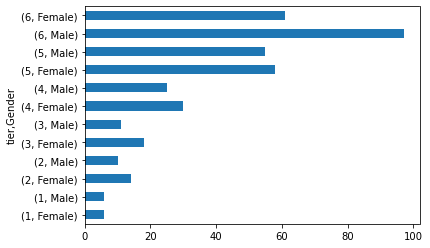

In [38]:
data_combined.groupby('tier').Gender.value_counts().plot.barh();

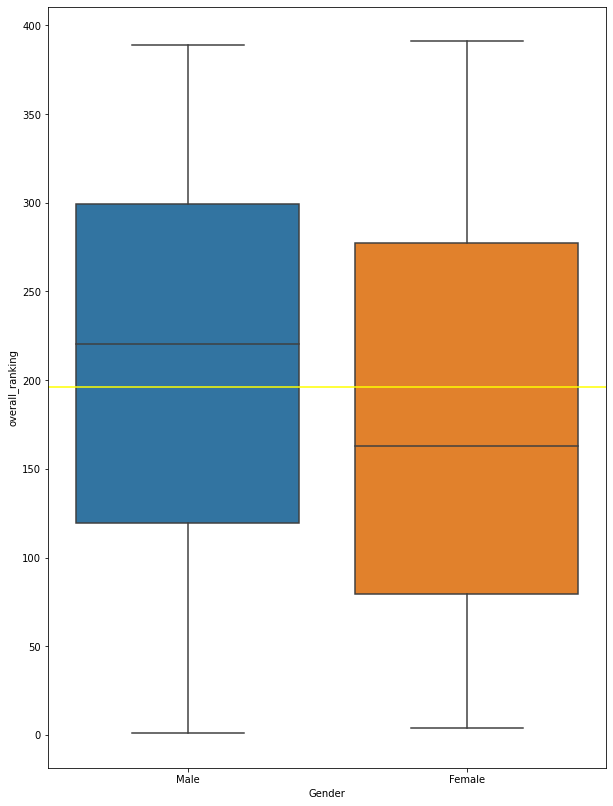

In [40]:
plt.figure(figsize=(10,14))
plt.axhline(overall_mean,color='yellow')
sns.boxplot(x="Gender",y="overall_ranking",data=data_combined)
plt.show()

In [42]:
pd.pivot_table(data_combined,index="tier",values="Catchphrase",columns="Gender",aggfunc="count")

Gender,Female,Male
tier,,
1,6,6
2,14,10
3,18,11
4,30,25
5,58,55
6,61,97


In [43]:
species_ranking = data_combined.groupby('Species').mean()['overall_ranking'].to_frame().reset_index().sort_values('overall_ranking')
species_ranking

,Species,overall_ranking
25,Octopus,17.333333
9,Deer,52.300000
34,Wolf,72.636364
5,Cat,94.521739
21,Koala,134.111111
10,Dog,139.750000
8,Cub,143.187500
17,Hamster,147.250000
32,Squirrel,148.611111
30,Rhino,155.333333


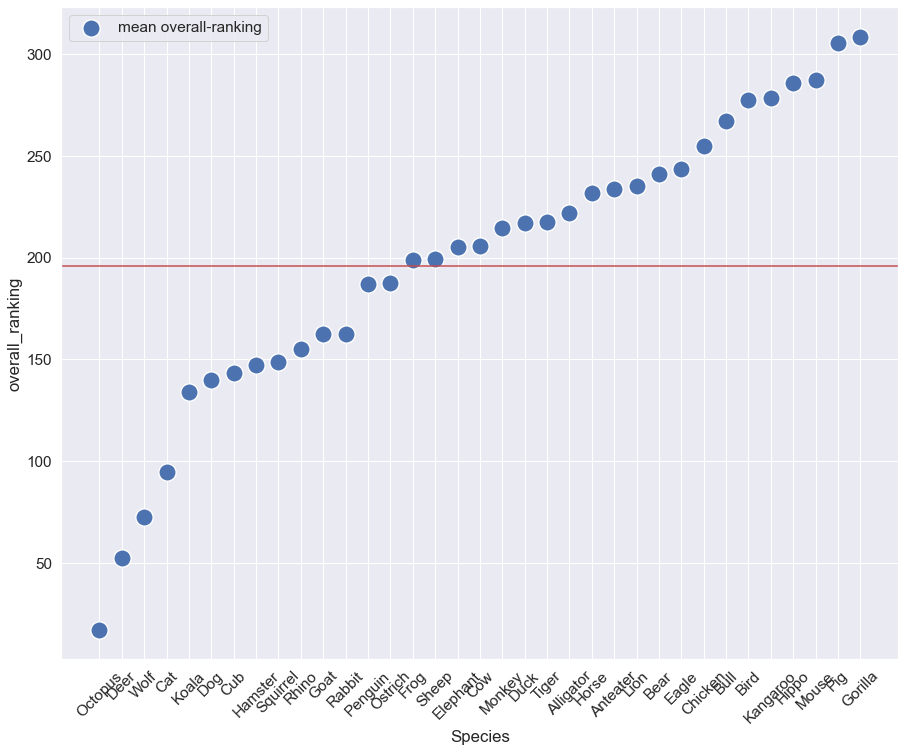

In [47]:
plt.figure(figsize=(15,12))
sns.set(font_scale=1.4)
plt.xticks(rotation=45)
plt.axhline(overall_mean, color='r')
sns.scatterplot(x='Species', y="overall_ranking", data=species_ranking,label='mean overall-ranking', s=300);

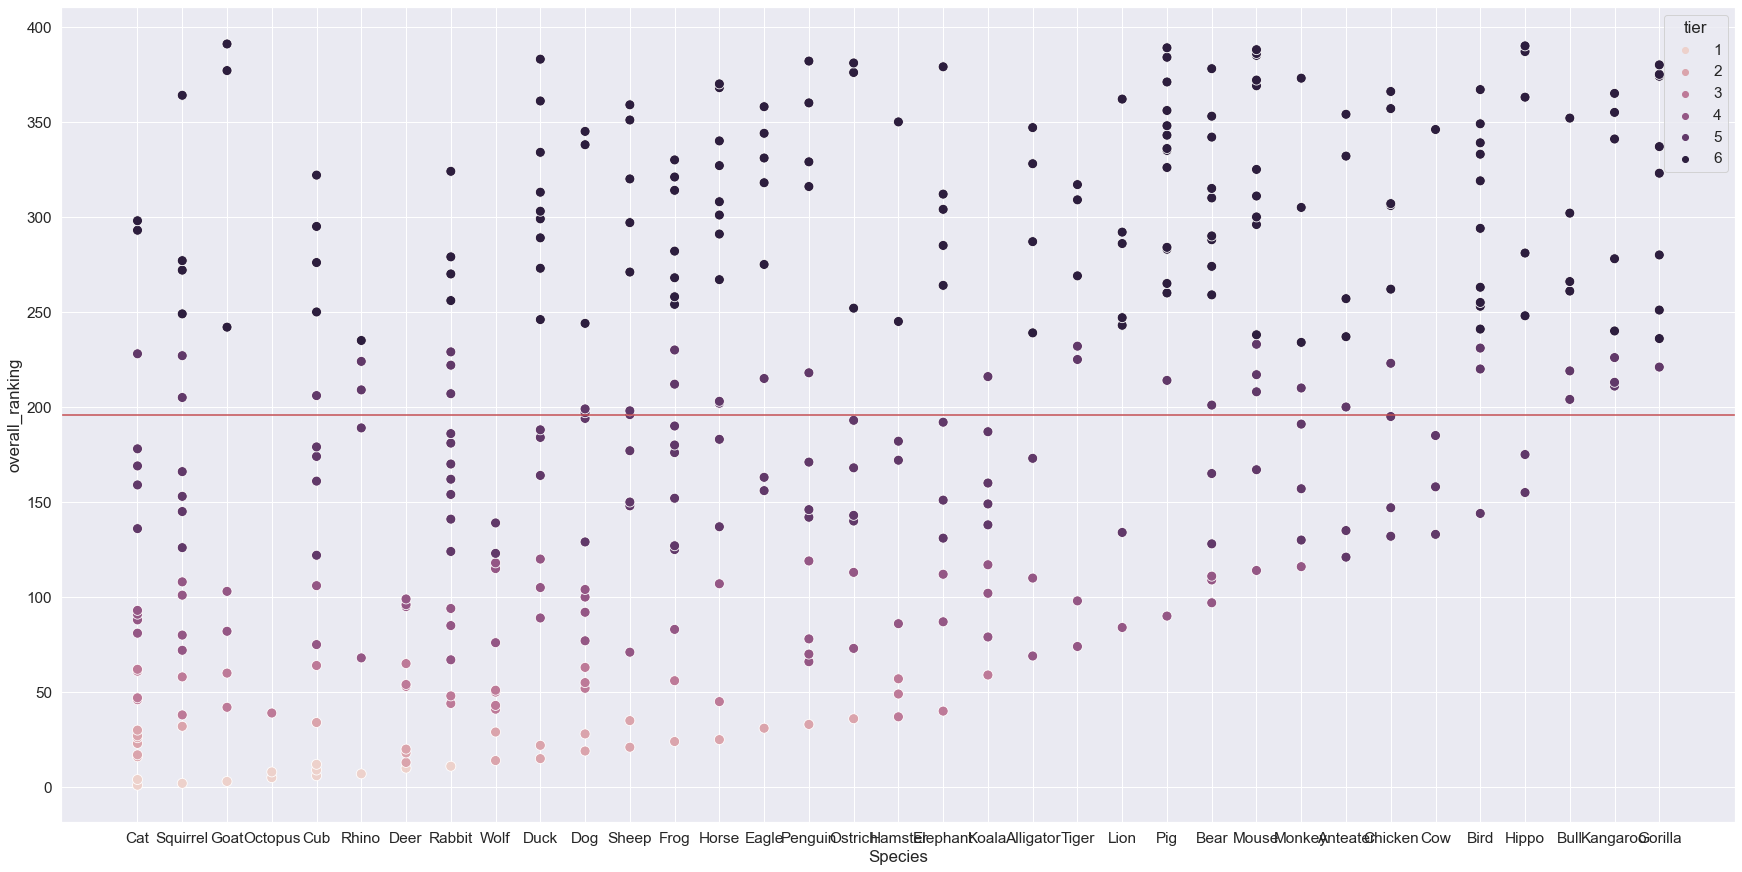

In [51]:
plt.figure(figsize=(30, 15))
plt.axhline(overall_mean, color='r')
sns.scatterplot(x="Species", y='overall_ranking', hue='tier', s=100, data=data_combined);

In [53]:
data_combined.Personality.value_counts()

Lazy          60
Normal        59
Jock          55
Snooty        55
Cranky        55
Peppy         49
Smug          34
Big Sister    24
Name: Personality, dtype: int64

In [54]:
personality_ranking = data_combined.groupby('Personality').mean()['overall_ranking'].to_frame().reset_index().sort_values('overall_ranking')

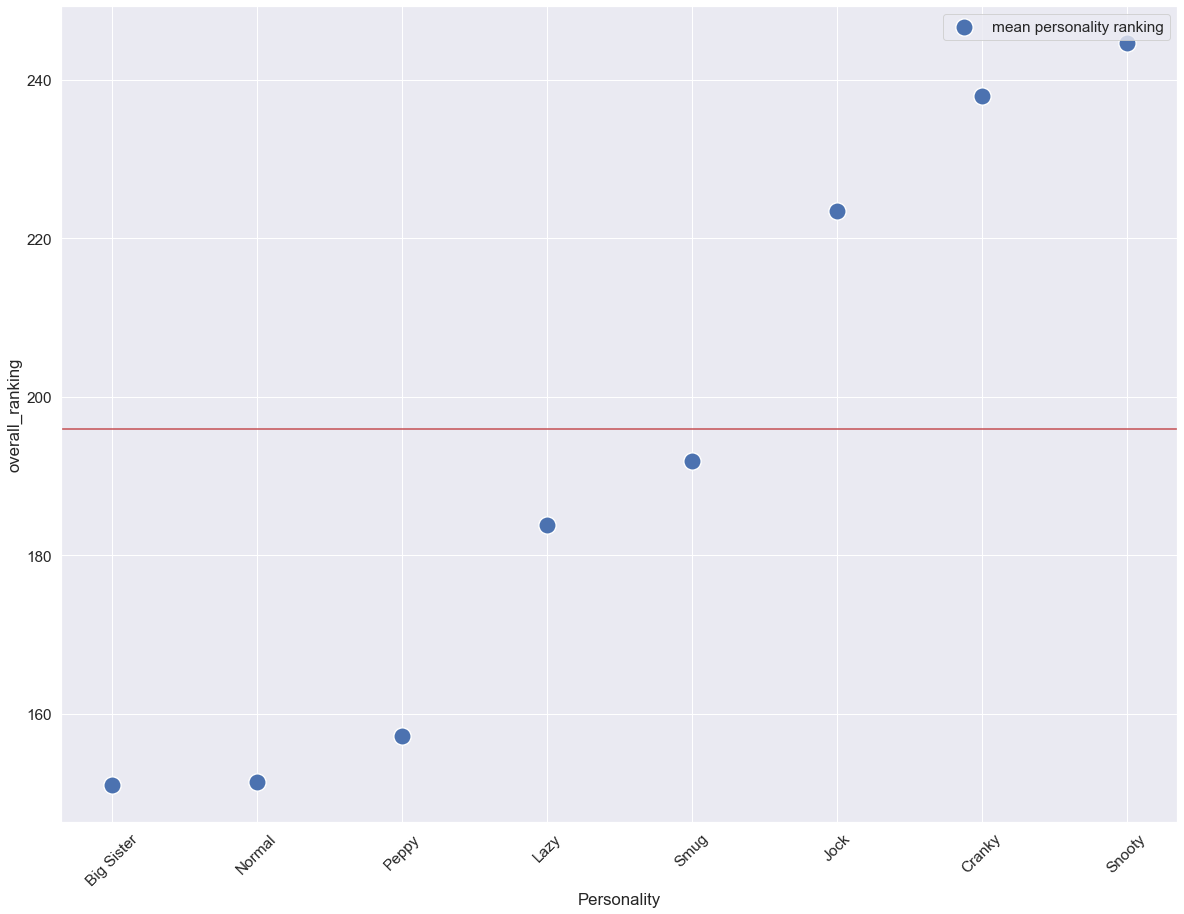

In [58]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
plt.xticks(rotation=45)
plt.axhline(overall_mean, color='r')
sns.scatterplot(x='Personality', y="overall_ranking", data=personality_ranking,label='mean personality ranking', s=300)
plt.show()

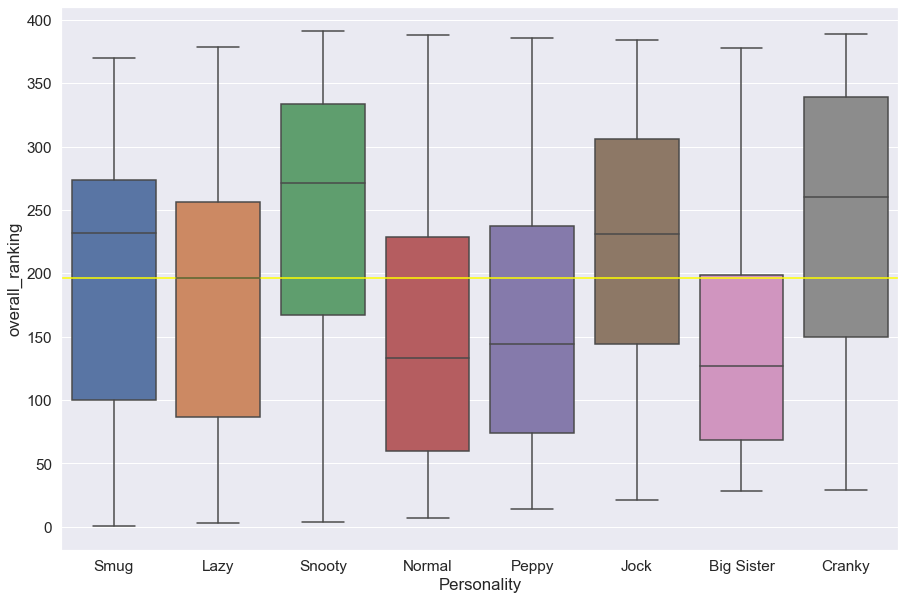

In [60]:
plt.figure(figsize=(15, 10))
plt.axhline(overall_mean, color='yellow')
sns.boxplot(x="Personality", y='overall_ranking', data=data_combined);

In [61]:
pd.pivot_table(data_combined, index = 'tier', values = 'Catchphrase', columns="Personality", aggfunc='count')

Personality,Big Sister,Cranky,Jock,Lazy,Normal,Peppy,Smug,Snooty
tier,,,,,,,,
1,NaN,NaN,NaN,4.0,4.0,NaN,2.0,2.0
2,1.0,2.0,2.0,4.0,6.0,6.0,2.0,1.0
3,5.0,4.0,3.0,2.0,8.0,4.0,2.0,1.0
4,6.0,5.0,5.0,9.0,8.0,10.0,6.0,6.0
5,8.0,13.0,18.0,19.0,19.0,16.0,5.0,15.0
6,4.0,31.0,27.0,22.0,14.0,13.0,17.0,30.0


In [62]:
style_ranking1 = data_combined.groupby('Style 1').mean()['overall_ranking'].to_frame().reset_index().sort_values('overall_ranking')
style_ranking2 = data_combined.groupby('Style 2').mean()['overall_ranking'].to_frame().reset_index().sort_values('overall_ranking')

In [63]:
style_ranking = style_ranking1.copy()
style_series = (style_ranking1['overall_ranking'] + style_ranking2['overall_ranking'])/2
style_ranking["overall_ranking"] = style_series

In [64]:
style_ranking

,Style 1,overall_ranking
2,Cute,138.013313
5,Simple,186.501926
3,Elegant,209.923611
1,Cool,216.789133
4,Gorgeous,219.507797
0,Active,226.170000


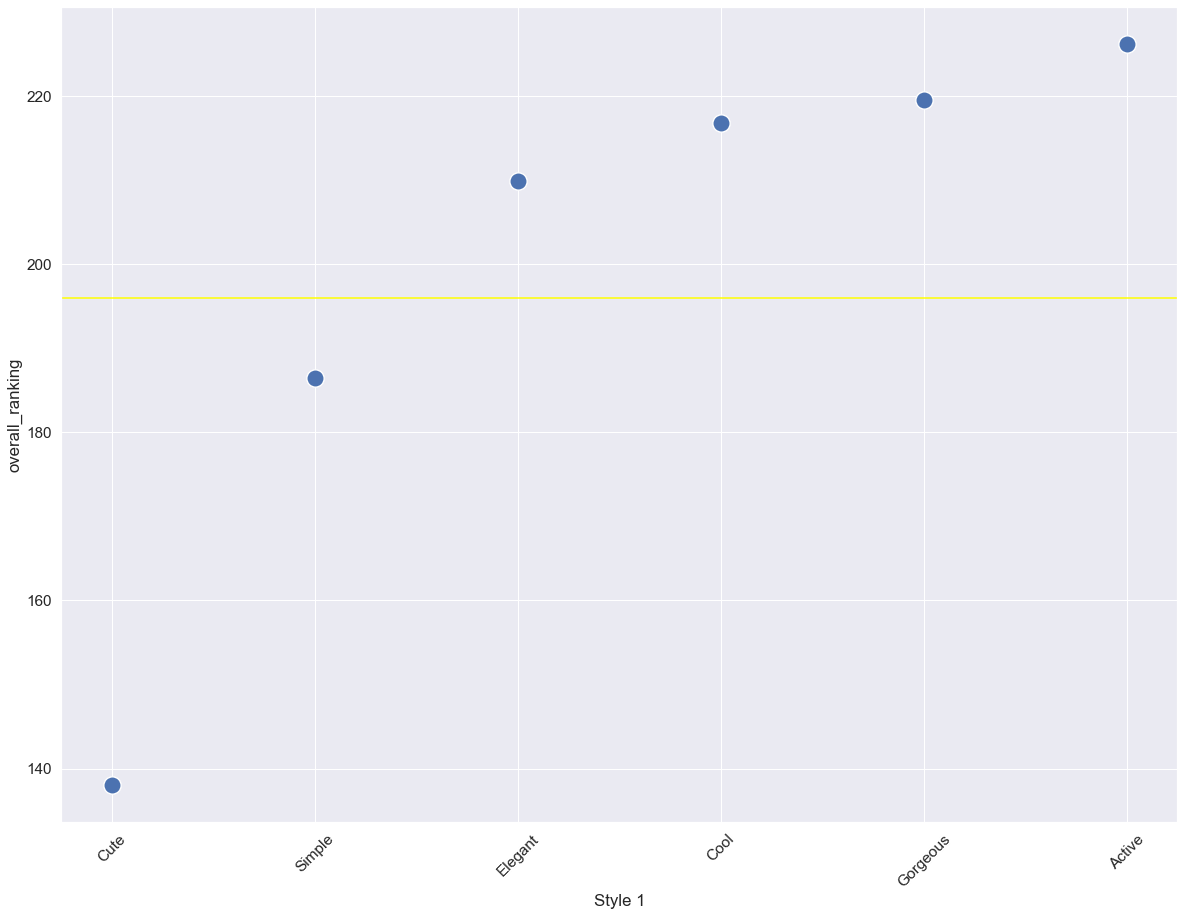

In [65]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
plt.xticks(rotation=45)
plt.axhline(overall_mean, color='yellow')
sns.scatterplot(x='Style 1', y="overall_ranking", data=style_ranking, s=300);

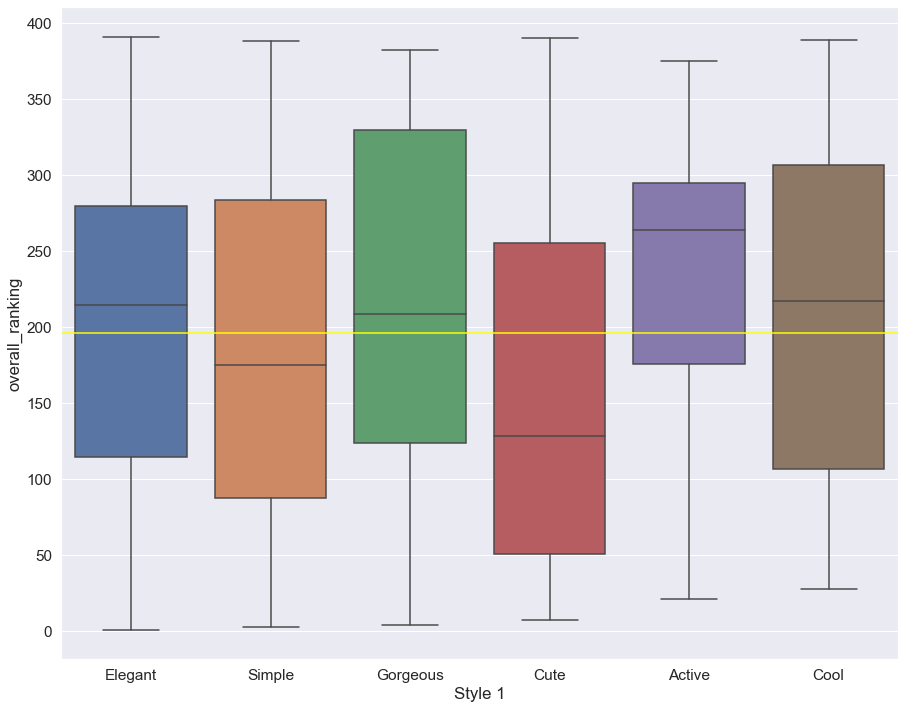

In [68]:
plt.figure(figsize=(15, 12))
plt.axhline(overall_mean, color='yellow')
sns.boxplot(x="Style 1", y='overall_ranking', data=data_combined)
plt.show()

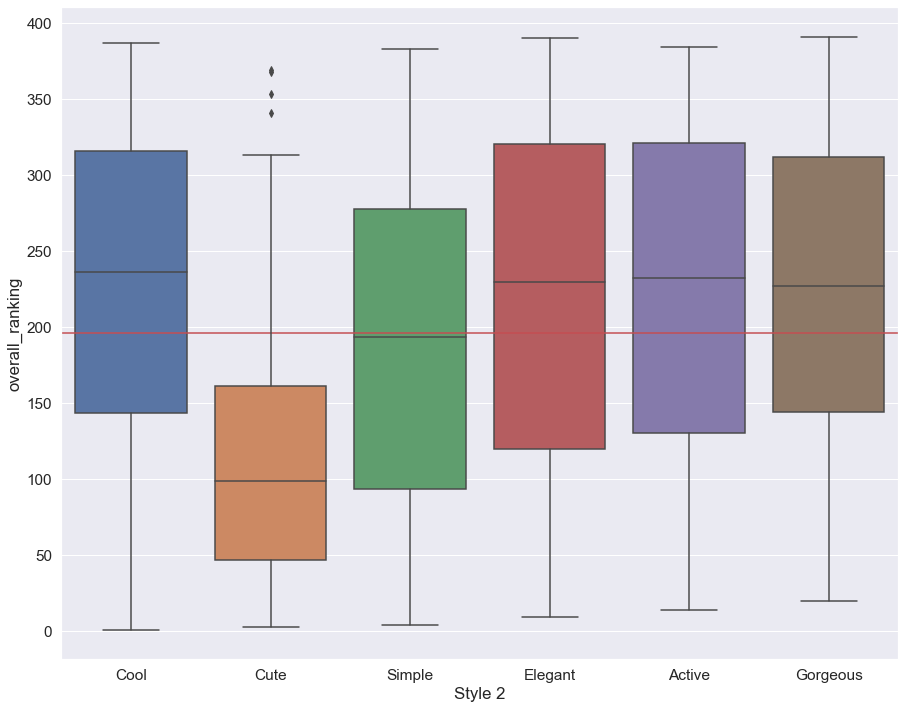

In [69]:
plt.figure(figsize=(15, 12))
plt.axhline(overall_mean, color='r')
sns.boxplot(x="Style 2", y='overall_ranking', data=data_combined)
plt.show()